# ***MNIST Dataset: Classifing Numbers***
## Method: Learning Classifer System

## **Initial Setup**

---
Before Implementing this Algorithm, Install eLCS package on Google Collab.

---

In [1]:
pip install scikit-eLCS

     |████████████████████████████████| 258 kB 8.0 MB/s 
  Created wheel for scikit-eLCS: filename=scikit_eLCS-1.2.3-py3-none-any.whl size=38593 sha256=a199a041fbb83e549685e5a52ed1a5d8b465a9bb9c3ac4391aa739a900f87fc3
  Stored in directory: /root/.cache/pip/wheels/97/97/69/dcb4cf87c2671813c166955429f3fdfff9ece959980c328bfb
Successfully built scikit-eLCS


# ***Load Dataset***

In [2]:
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer

In [3]:
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test= x_train/ 255.0, x_test /255.0
Y_train=LabelBinarizer().fit_transform(y_train)
Y_test=LabelBinarizer().fit_transform(y_test)

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
from skeLCS import eLCS

model = eLCS()

# **Model Setup**

---

In [5]:
model = eLCS(learning_iterations = 50,nu = 10)

# **Image processing**

---
This section splits up and reconstructs the image in a way where the image can be properly process through the eLCS model. 

---

In [6]:
a=len(x_train)
b=len(x_train[0])
c=len(x_train[0][0])
d=b*c

x_train_1=x_train.reshape([a,d])

# ***PCA***

In [7]:
from sklearn.decomposition import PCA
x_train_reduced = PCA(n_components=50).fit_transform(x_train_1)

# **Model Training**

---

In [8]:
model = eLCS(N=60000, learning_iterations = 50,track_accuracy_while_fit=True)
trainedModel = model.fit(x_train_reduced,y_train)

trainedModel

eLCS(N=60000, acc_sub=0.99, beta=0.2, chi=0.8, delta=0.1,
     discrete_attribute_limit=10, do_GA_subsumption=True,
     do_correct_set_subsumption=False, fitness_reduction=0.1, init_fit=0.01,
     learning_iterations=50, match_for_missingness=False, mu=0.04, nu=5,
     p_spec=0.5, random_state=None, reboot_filename=None,
     selection_method='tournament',
     specified_attributes=array([], dtype=float64), theta_GA=25, theta_del=20,
     theta_sel=0.5, theta_sub=20, track_accuracy_while_fit=True)

# **ROC Curve**

---

In [9]:
e=len(x_test)
f=len(x_test[0])
g=len(x_test[0][0])
h=f*g

x_test_1=x_test.reshape([e,h])

In [10]:
x_test_reduced = PCA(n_components=50).fit_transform(x_test_1)

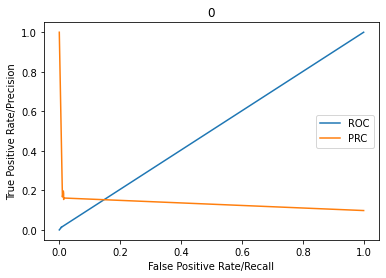

PRC AUC:0.1345543494959074
ROC AUC:0.5033356147336984


In [11]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(x_test_reduced)
fpr1, tpr1, thresholds1 = roc_curve(Y_test[:,0], probs[:, 0])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test[:,0], probs[:, 0])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

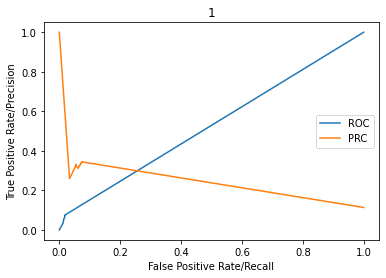

PRC AUC:0.24562038071223696
ROC AUC:0.5281587990190597


In [12]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test[:,1], probs[:, 1])
prec2, recall2, thresholds2 = precision_recall_curve(Y_test[:,1], probs[:, 1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('1')
plt.show()

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

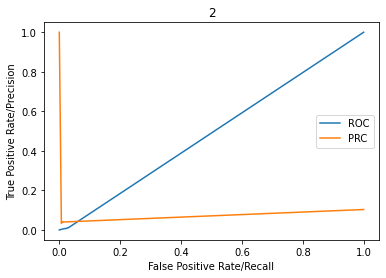

PRC AUC:0.07445281287804359
ROC AUC:0.4905571338056414


In [13]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test[:,2], probs[:, 2])
prec3, recall3, thresholds3 = precision_recall_curve(Y_test[:,2], probs[:, 2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('2')
plt.show()

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

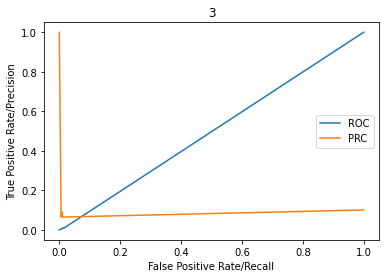

PRC AUC:0.08563780221772571
ROC AUC:0.49695393121069614


In [14]:
fpr4, tpr4, thresholds4 = roc_curve(Y_test[:,3], probs[:, 3])
prec4, recall4, thresholds4 = precision_recall_curve(Y_test[:,3], probs[:, 3])

plt.plot(fpr4,tpr4,label="ROC")
plt.plot(recall4,prec4,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('3')
plt.show()

print("PRC AUC:" + str(auc(recall4, prec4)))
print("ROC AUC:" + str(auc(fpr4, tpr4)))

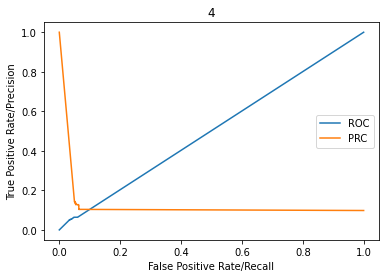

PRC AUC:0.12491672142244273
ROC AUC:0.502501390068923


In [15]:
fpr5, tpr5, thresholds5 = roc_curve(Y_test[:,4], probs[:, 4])
prec5, recall5, thresholds5 = precision_recall_curve(Y_test[:,4], probs[:, 4])

plt.plot(fpr5,tpr5,label="ROC")
plt.plot(recall5,prec5,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('4')
plt.show()

print("PRC AUC:" + str(auc(recall5, prec5)))
print("ROC AUC:" + str(auc(fpr5, tpr5)))

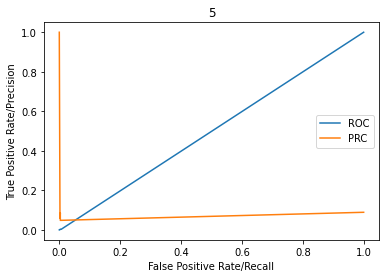

PRC AUC:0.06984435201246708
ROC AUC:0.498446457655124


In [16]:
fpr6, tpr6, thresholds6 = roc_curve(Y_test[:,5], probs[:, 5])
prec6, recall6, thresholds6 = precision_recall_curve(Y_test[:,5], probs[:, 5])

plt.plot(fpr6,tpr6,label="ROC")
plt.plot(recall6,prec6,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('5')
plt.show()

print("PRC AUC:" + str(auc(recall6, prec6)))
print("ROC AUC:" + str(auc(fpr6, tpr6)))

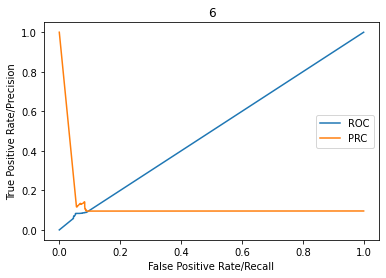

PRC AUC:0.12263463734423419
ROC AUC:0.5006816946571301


In [17]:
fpr7, tpr7, thresholds7 = roc_curve(Y_test[:,6], probs[:, 6])
prec7, recall7, thresholds7 = precision_recall_curve(Y_test[:,6], probs[:, 6])

plt.plot(fpr7,tpr7,label="ROC")
plt.plot(recall7,prec7,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('6')
plt.show()

print("PRC AUC:" + str(auc(recall7, prec7)))
print("ROC AUC:" + str(auc(fpr7, tpr7)))

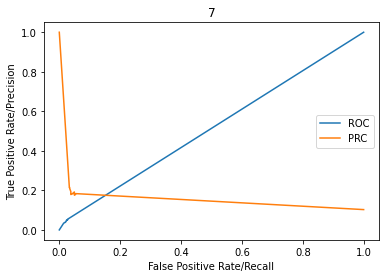

PRC AUC:0.15949861503168591
ROC AUC:0.5134185841467879


In [18]:
fpr8, tpr8, thresholds8 = roc_curve(Y_test[:,7], probs[:, 7])
prec8, recall8, thresholds8 = precision_recall_curve(Y_test[:,7], probs[:, 7])

plt.plot(fpr8,tpr8,label="ROC")
plt.plot(recall8,prec8,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('7')
plt.show()

print("PRC AUC:" + str(auc(recall8, prec8)))
print("ROC AUC:" + str(auc(fpr8, tpr8)))

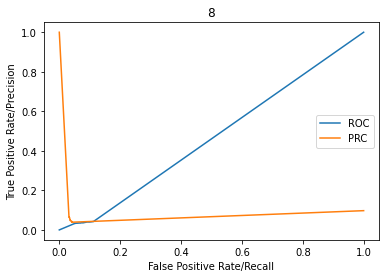

PRC AUC:0.08279919035052229
ROC AUC:0.4658610580158347


In [19]:
fpr9, tpr9, thresholds9 = roc_curve(Y_test[:,8], probs[:, 8])
prec9, recall9, thresholds9 = precision_recall_curve(Y_test[:,8], probs[:, 8])

plt.plot(fpr9,tpr9,label="ROC")
plt.plot(recall9,prec9,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('8')
plt.show()

print("PRC AUC:" + str(auc(recall9, prec9)))
print("ROC AUC:" + str(auc(fpr9, tpr9)))

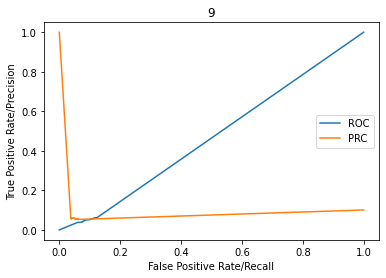

PRC AUC:0.09364116143532872
ROC AUC:0.4695396861457868


In [20]:
fpr10, tpr10, thresholds10 = roc_curve(Y_test[:,9], probs[:, 9])
prec10, recall10, thresholds10 = precision_recall_curve(Y_test[:,9], probs[:, 9])

plt.plot(fpr10,tpr10,label="ROC")
plt.plot(recall10,prec10,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('9')
plt.show()

print("PRC AUC:" + str(auc(recall10, prec10)))
print("ROC AUC:" + str(auc(fpr10, tpr10)))

In [21]:
print(probs[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
print(Y_test[0])

[0 0 0 0 0 0 0 1 0 0]


In [23]:
print(prec10)

[0.1009     0.0529462  0.05299145 0.05303678 0.05335628 0.05340224
 0.05481874 0.05486726 0.05491585 0.05496454 0.05501331 0.05506217
 0.05516014 0.05525847 0.05530776 0.05461056 0.0546595  0.05480683
 0.05530372 0.0553539  0.05555556 0.0556062  0.05565693 0.05533597
 0.05440158 0.05450942 0.055      0.05505506 0.05561173 0.05566802
 0.05578093 0.05595117 0.05623722 0.05463918 0.05469556 0.05475207
 0.05480869 0.05486542 0.05497925 0.05509356 0.05515088 0.05549738
 0.05555556 0.05561385 0.05573081 0.05620361 0.05638298 0.05579399
 0.05585392 0.05797101 0.05803571 0.05855856 0.05862458 0.05922551
 0.05949657 0.05956472 0.05997693 0.05943152 0.05989583 0.06013072
 0.06060606 0.06068602 0.0590604  0.05913978 0.05802969 0.05753425
 0.05761317 0.05769231 0.05777166 0.05610098 0.05641749 0.05681818
 0.05714286 0.05722461 0.05627706 0.05643994 0.05660377 0.05752212
 0.06055901 0.0608     0.06219313 0.06239737 0.0625     0.06506849
 0.0652921  0.06585789 0.06620209 1.        ]


In [24]:
print(recall10)

[1.         0.06144698 0.06144698 0.06144698 0.06144698 0.06144698
 0.06144698 0.06144698 0.06144698 0.06144698 0.06144698 0.06144698
 0.06144698 0.06144698 0.06144698 0.0604559  0.0604559  0.0604559
 0.0604559  0.0604559  0.0604559  0.0604559  0.0604559  0.0555005
 0.05450942 0.05450942 0.05450942 0.05450942 0.05450942 0.05450942
 0.05450942 0.05450942 0.05450942 0.05252725 0.05252725 0.05252725
 0.05252725 0.05252725 0.05252725 0.05252725 0.05252725 0.05252725
 0.05252725 0.05252725 0.05252725 0.05252725 0.05252725 0.05153617
 0.05153617 0.05153617 0.05153617 0.05153617 0.05153617 0.05153617
 0.05153617 0.05153617 0.05153617 0.04558969 0.04558969 0.04558969
 0.04558969 0.04558969 0.04360753 0.04360753 0.04261645 0.04162537
 0.04162537 0.04162537 0.04162537 0.03964321 0.03964321 0.03964321
 0.03964321 0.03964321 0.03865213 0.03865213 0.03865213 0.03865213
 0.03865213 0.03766105 0.03766105 0.03766105 0.03766105 0.03766105
 0.03766105 0.03766105 0.03766105 0.        ]
